# weather prediction
=======================================

#import labrary

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import numpy as np

In [2]:
weather=pd.read_csv('weatherAUS.csv')

In [3]:
weather.head(3)

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   

   RainTomorrow  
0            No  
1            No  
2            No  

[3 rows x 23 columns]

In [4]:
weather.shape

(145460, 23)

# data_cleaning

In [5]:
def clean_data(df):
    return(
        df
        .drop(columns=["Date","RainTomorrow"])
        .dropna(subset=["RainToday"])
    
        .assign(                                         #            ---------------->                   rain today
                 RainToday=lambda df_:(
                    df_
                    .RainToday
                    .map({"No": 0, "Yes": 1})
    
                 )
            
            )

    )

In [6]:
data=clean_data(weather)

In [7]:
data.head(4)

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0   Albury     13.4     22.9       0.6          NaN       NaN           W   
1   Albury      7.4     25.1       0.0          NaN       NaN         WNW   
2   Albury     12.9     25.7       0.0          NaN       NaN         WSW   
3   Albury      9.2     28.0       0.0          NaN       NaN          NE   

   WindGustSpeed WindDir9am WindDir3pm  ...  WindSpeed3pm  Humidity9am  \
0           44.0          W        WNW  ...          24.0         71.0   
1           44.0        NNW        WSW  ...          22.0         44.0   
2           46.0          W        WSW  ...          26.0         38.0   
3           24.0         SE          E  ...           9.0         45.0   

   Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0         22.0       1007.7       1007.1       8.0       NaN     16.9   
1         25.0       1010.6       1007.8       NaN       NaN     17.2   
2         30.0       1007.6       1008.7       NaN       2.0     21.0   
3         16.0       1017.6       1012.8       NaN       NaN     18.1   

   Temp3pm  RainToday  
0     21.8          0  
1     24.3          0  
2     23.2          0  
3     26.5          0  

[4 rows x 21 columns]

#  EDA 
-----------------------------
#### High levels summary of data

#### duplicated value

In [8]:
data.duplicated().sum()

np.int64(49)

#### null value 

In [9]:
(data.isnull().sum() / len(data)) * 100


Location          0.000000
MinTemp           0.342478
MaxTemp           0.330523
Rainfall          0.000000
Evaporation      42.537571
Sunshine         47.693725
WindGustDir       6.839007
WindGustSpeed     6.796813
WindDir9am        6.884015
WindDir3pm        2.671608
WindSpeed9am      0.767235
WindSpeed3pm      1.861476
Humidity9am       1.092835
Humidity3pm       2.552761
Pressure9am       9.803163
Pressure3pm       9.840435
Cloud9am         37.504483
Cloud3pm         39.996062
Temp9am           0.481719
Temp3pm           1.931097
RainToday         0.000000
dtype: float64

#### category type of analysis

In [10]:
data.describe(include="O").T

count unique       top   freq
Location     142199     49  Canberra   3418
WindGustDir  132474     16         W   9738
WindDir9am   132410     16         N  11405
WindDir3pm   138400     16        SE  10668

observation
- canberra location have top frequency 
- windgustdir top rate direction west
- winddir9am top rate direction north

#### Imbalance Detection of target column

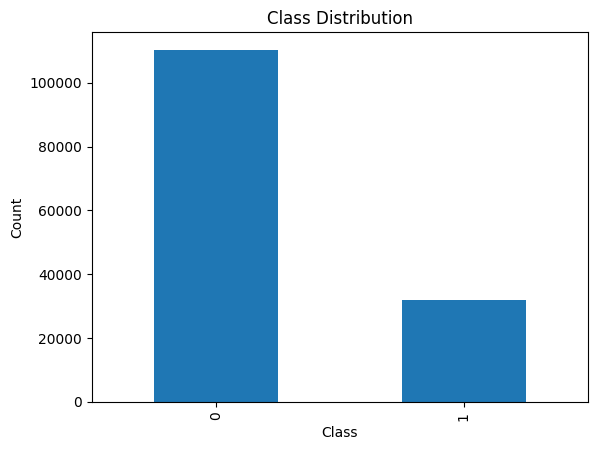

RainToday
0    77.580714
1    22.419286
Name: proportion, dtype: float64

In [11]:
data['RainToday'].value_counts().plot(kind='bar')
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


data['RainToday'].value_counts(normalize=True) * 100

#### countplot for categorical columns

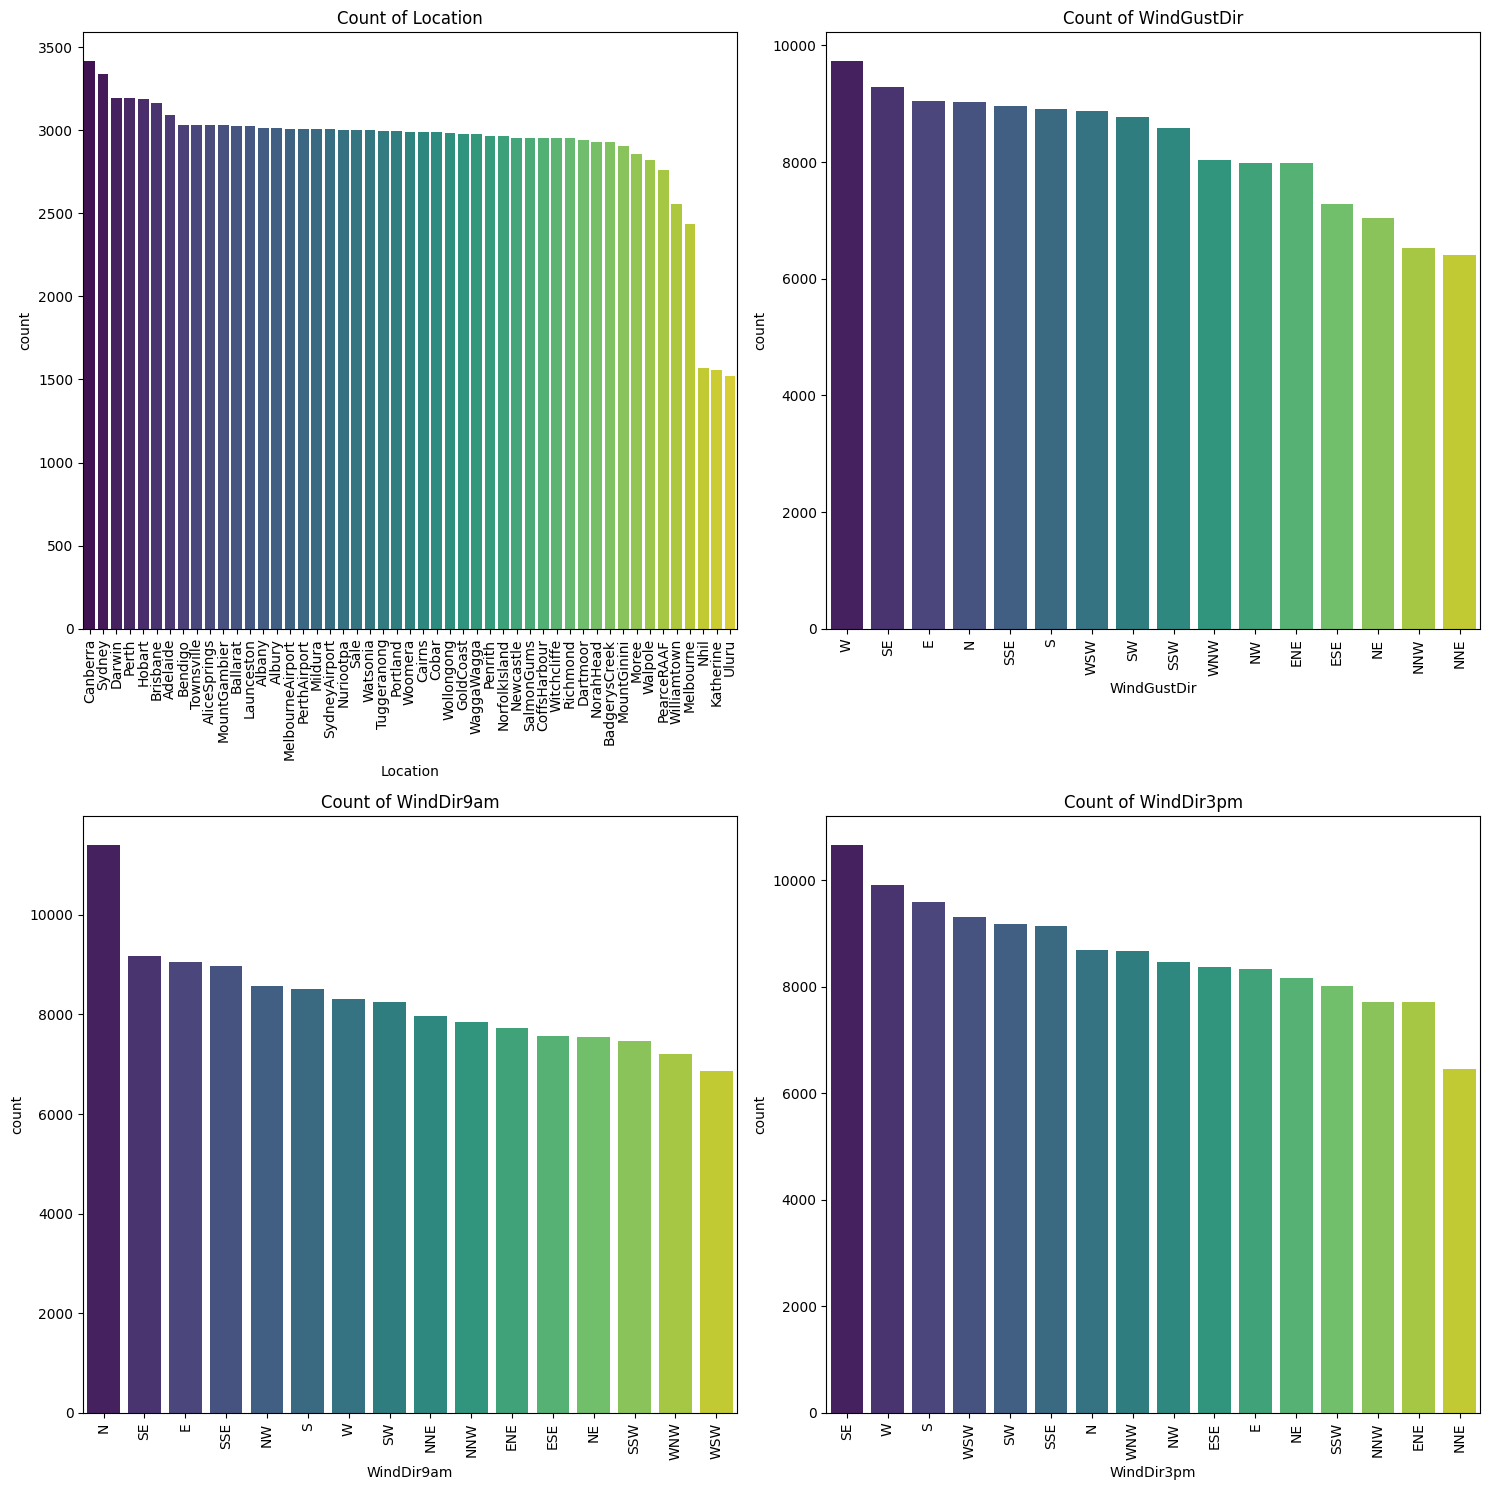

In [41]:

categorical_cols = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']

plt.figure(figsize=(15, 15))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=data[col], order=data[col].value_counts().index, palette="viridis")
    plt.title(f"Count of {col}")
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


#### histplot for numeric columns

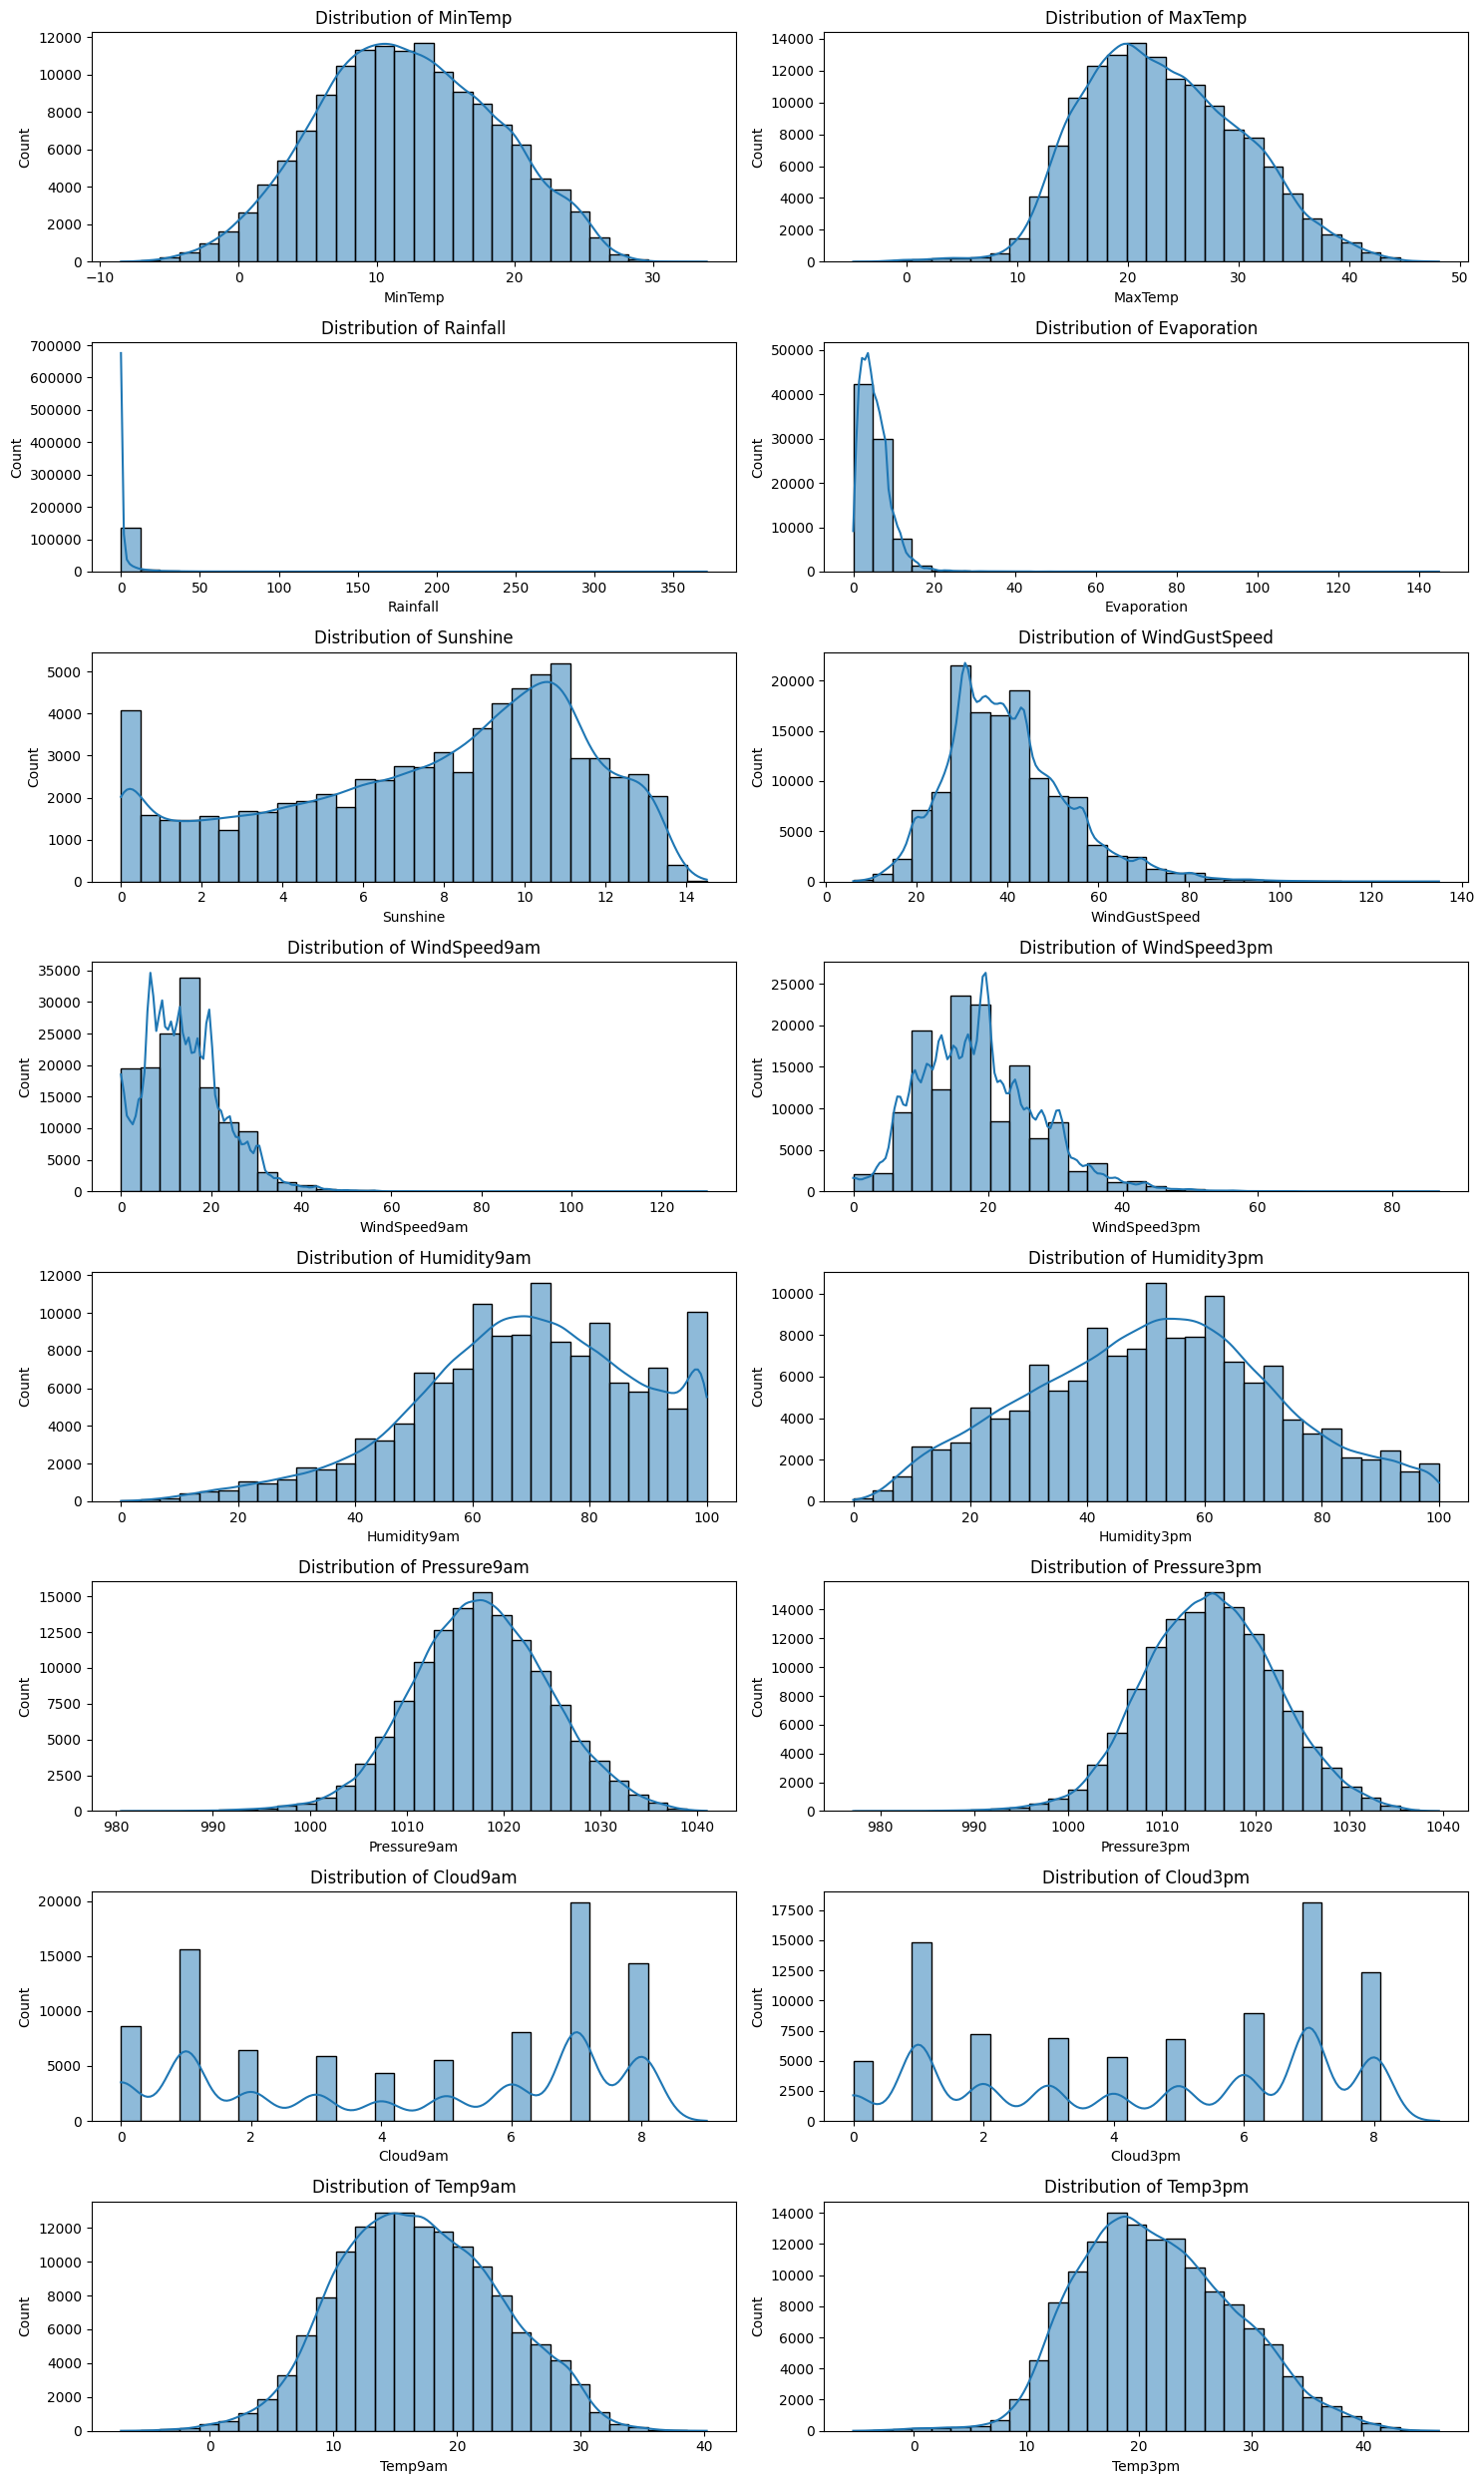

In [39]:

numeric_cols = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
                'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
                'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm',
                'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']

# Create histograms for all numeric columns
plt.figure(figsize=(15, 25))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(8, 2, i)  # 8 rows, 2 columns
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()


observation
- temp9am and temp3pm are normal distribution
- cloud9am and cloud3pm are discrete value 
- pressure9am and pressure3pm are normal distribution
- windspeed9am and windspeed3pm are right skewed
- mintemp or maxtemp are normal distribution

#### Heatmap

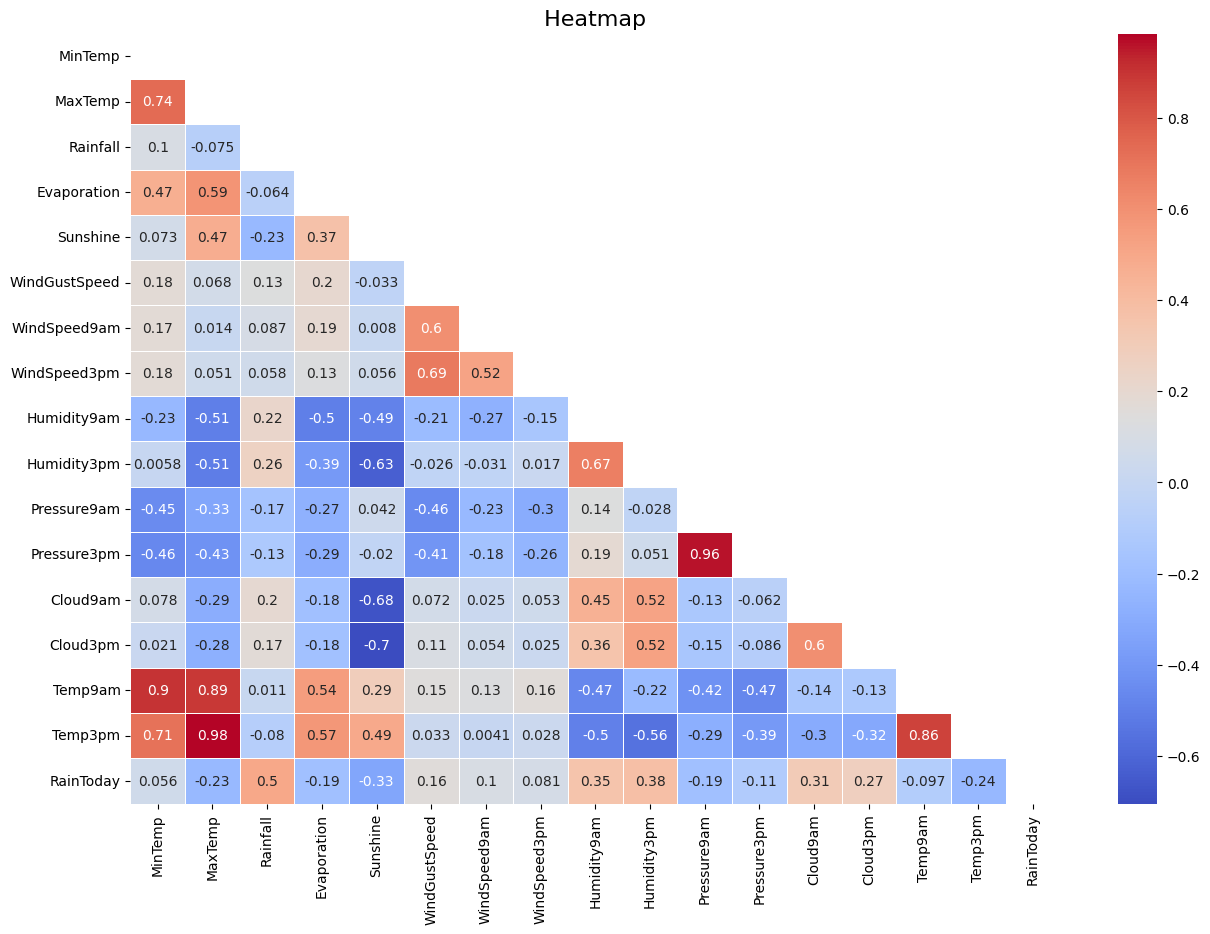

In [14]:


plt.figure(figsize=(15, 10))
corr = data.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title(' Heatmap ', fontsize=16)
plt.show()


observation
- MinTemp and MaxTemp show a strong positive correlation (0.74).
- Temp9am and Temp3pm have a very strong positive correlation (0.86).
- Pressure9am and Pressure3pm are highly correlated (0.96).
- Evaporation and Sunshine show a moderate positive correlation (0.37).
- WindSpeed9am and WindSpeed3pm are moderately correlated (0.52).
- Humidity9am and Humidity3pm show a good positive correlation (0.67).
- Humidity (both 9am and 3pm) has a negative correlation with Temperature (Temp9am, Temp3pm).
- Pressure (9am, 3pm) has a negative correlation with Temperature.
- RainToday shows weak to moderate positive correlation with Humidity3pm and Cloud3pm.
- RainToday has a negative correlation with Sunshine, indicating less sunshine increases rain chances.
- Overall, temperature-related features are strongly interlinked, showing consistent daily temperature variation.

#### pairplot

<Figure size 1000x500 with 0 Axes>

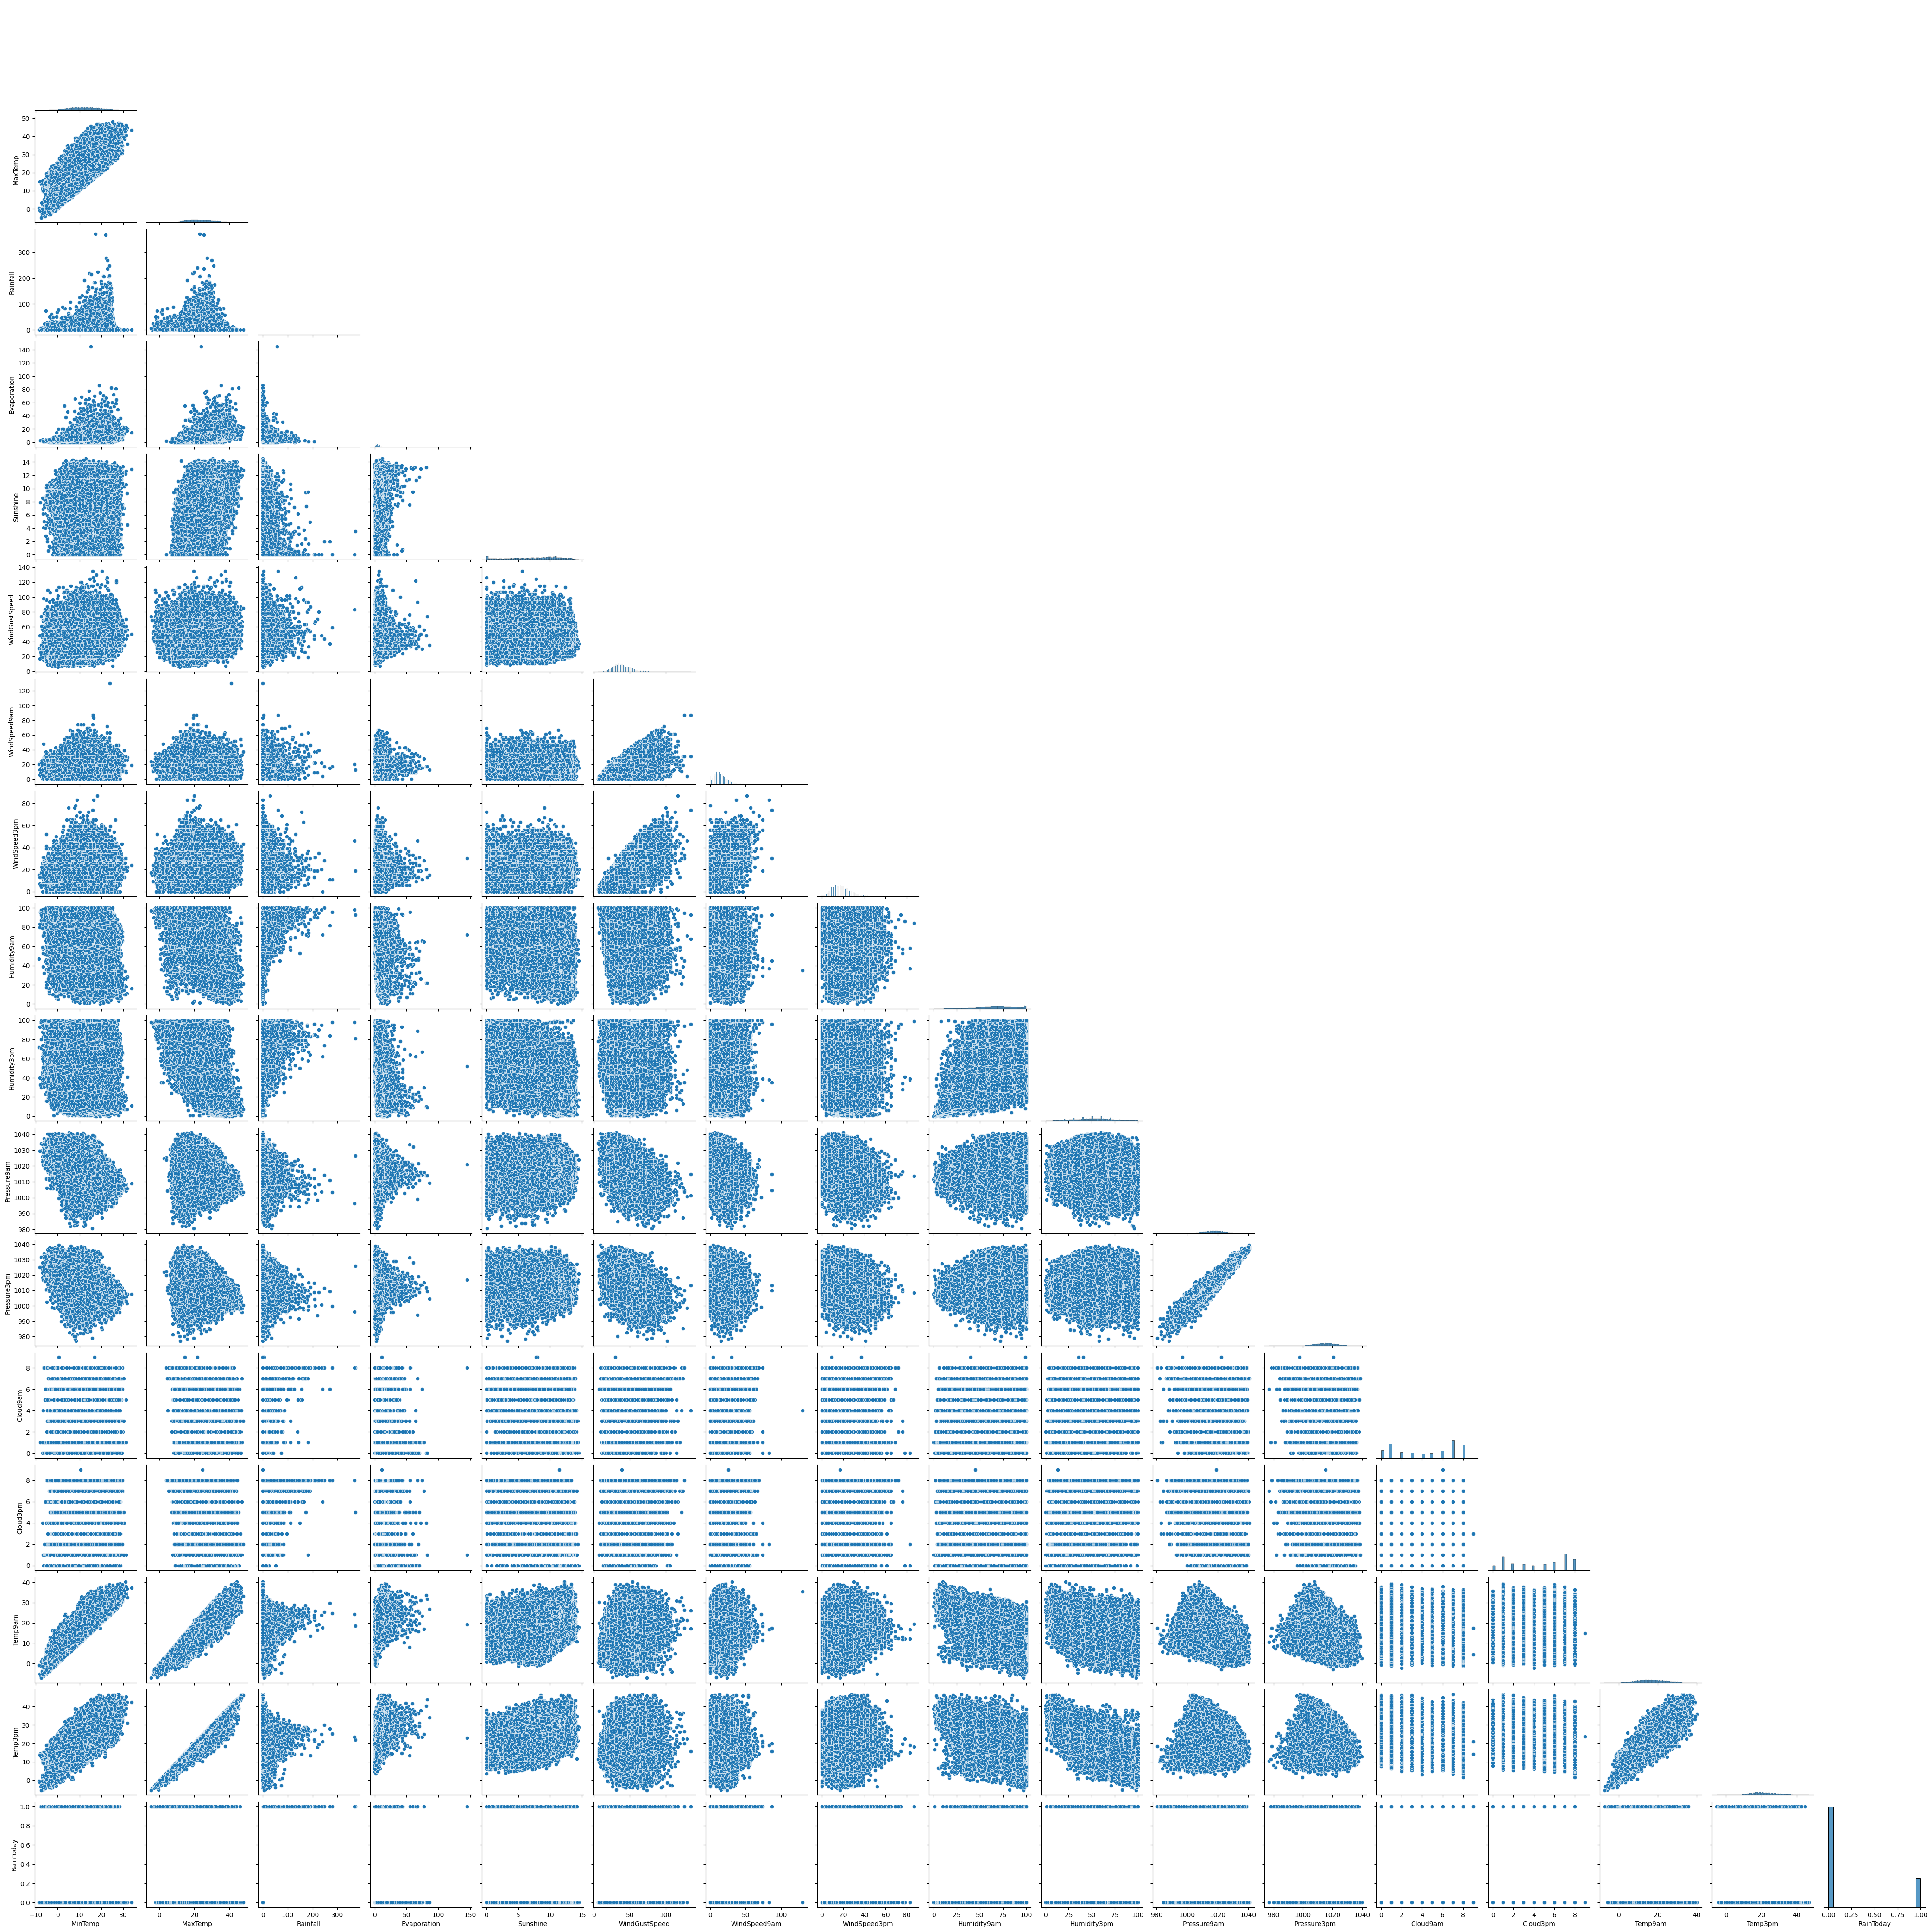

In [15]:
plt.figure(figsize=(10,5))
sns.pairplot(data,corner=True)

obervation
- MinTemp vs MaxTemp — strong positive linear relationship.
- Temp9am and Temp3pm — strong positive linear relationship; both increase together.
- Pressure9am and Pressure3pm — almost perfect positive linear relation.
- Humidity9am and Humidity3pm — moderately positive correlation.
- WindSpeed9am and WindSpeed3pm — moderate positive relationship.
- Evaporation and Sunshine — positive relation; more sunshine increases evaporation.
- Humidity shows negative relation with Temperature (as temperature rises, humidity falls).
- Pressure shows a slightly negative trend with Temperature.
- RainToday tends to occur when Humidity is high and Sunshine is low.


# spreate a input and output

In [14]:
input_data=data.drop(columns="RainToday")
output_data=data["RainToday"]

# train_test_split

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
# Split into training and testing sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(input_data,output_data, test_size=0.2, random_state=42)

# Further split the training set into training and validation sets (80% train, 20% val)
#x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=42)


In [17]:
print(x_train.shape)
print(x_test.shape)
#print(x_val.shape)


(113759, 20)
(28440, 20)


# ColumnTransformer

In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,TargetEncoder
import category_encoders as ce
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense ,Dropout
from tensorflow.keras.optimizers import Adam, SGD 
from tensorflow.keras.callbacks import EarlyStopping
from keras.regularizers import l1, l2
from sklearn.preprocessing import StandardScaler

In [22]:



categorical_cols = ["Cloud3pm", "Cloud9am", "WindGustDir", "WindDir9am", "WindDir3pm"]
numeric_median_cols = ['Rainfall','Evaporation','Sunshine','WindGustSpeed',
                       'WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm']
numeric_mean_cols = ['MinTemp','MaxTemp','Pressure9am','Pressure3pm','Temp9am','Temp3pm']

# Transformer
transformer = ColumnTransformer(
    transformers=[
        ('cat_imputer', SimpleImputer(strategy="most_frequent"), categorical_cols),
        ('num_median', SimpleImputer(strategy="median"), numeric_median_cols),
        ('num_mean', SimpleImputer(strategy="mean"), numeric_mean_cols),
        ('onehot', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'),
                  ['Location','WindGustDir','WindDir9am','WindDir3pm'])
    ],
    remainder='passthrough'
)

# Fit & transform
x_train_transformed = transformer.fit_transform(x_train)
x_test_transformed = transformer.transform(x_test)

# Column names
imputer_cols = categorical_cols + numeric_median_cols + numeric_mean_cols
onehot_cols = transformer.named_transformers_['onehot'].get_feature_names_out(
    input_features=['Location','WindGustDir','WindDir9am','WindDir3pm']
)
remainder_cols = [col for col in x_train.columns if col not in 
                  (['Location'] + categorical_cols + numeric_median_cols + numeric_mean_cols)]

# Final column names
final_columns = imputer_cols + list(onehot_cols) + remainder_cols

# Convert to DataFrame
x_train_transformed = pd.DataFrame(x_train_transformed, columns=final_columns, index=x_train.index)
x_test_transformed = pd.DataFrame(x_test_transformed, columns=final_columns, index=x_test.index)


x_train_transformed=x_train_transformed.drop(columns=['Cloud3pm','Cloud9am','WindGustDir','WindDir9am','WindDir3pm'])
x_test_transformed=x_test_transformed.drop(columns=['Cloud3pm','Cloud9am','WindGustDir','WindDir9am','WindDir3pm'])


# Initialize the scaler
scaler = StandardScaler()

# Fit on train, transform both
x_train_scaled = scaler.fit_transform(x_train_transformed)
x_test_scaled = scaler.transform(x_test_transformed)

# Optional: convert back to DataFrame with the same column names
x_train_transformed = pd.DataFrame(x_train_scaled, columns=x_train_transformed.columns)
x_test_transformed = pd.DataFrame(x_test_scaled, columns=x_test_transformed.columns)






# apply smote on imbalance data

In [24]:
from imblearn.over_sampling import SMOTE

In [25]:
from collections import Counter
print("Before SMOTE:", Counter(y_train))

smote = SMOTE(random_state=42)
x_train_balanced, y_train_balanced = smote.fit_resample(x_train_scaled, y_train)

print("After SMOTE:", Counter(y_train_balanced))

# ===============================
# Final Datasets ready for modeling
# ===============================
print("x_train_balanced shape:", x_train_balanced.shape)
print("x_test_scaled shape:", x_test_scaled.shape)
print("y_train_balanced shape:", y_train_balanced.shape)
print("y_test shape:", y_test.shape)


Before SMOTE: Counter({0: 88303, 1: 25456})
After SMOTE: Counter({0: 88303, 1: 88303})
x_train_balanced shape: (176606, 110)
x_test_scaled shape: (28440, 110)
y_train_balanced shape: (176606,)
y_test shape: (28440,)


# apply ANN MODEL

In [26]:
ann = Sequential()
ann.add(Dense(380, input_dim=110, activation='relu'))  # use relu

ann.add(Dropout(0.2))
ann.add(Dense(240, activation='relu'))
#ann.add(Dropout(0.2))
ann.add(Dense(220, activation='relu'))
ann.add(Dropout(0.3))
ann.add(Dense(200, activation='relu'))
#ann.add(Dropout(0.2))
ann.add(Dense(80, activation='relu'))
ann.add(Dropout(0.2))
ann.add(Dense(1, activation='sigmoid')) 
ann.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 380)                 │          42,180 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 380)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 240)                 │          91,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 220)                 │          53,020 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 220)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 200)                 │          44,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 80)                  │          16,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 80)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              81 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 247,001 (964.85 KB)

 Trainable params: 247,001 (964.85 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
ann.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])


In [28]:
history = ann.fit(x_train_balanced, y_train_balanced , validation_data=(x_test_scaled, y_test),
                    epochs=20, batch_size=32)


Epoch 1/20
5519/5519 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - accuracy: 0.9273 - loss: 0.1643 - val_accuracy: 0.9872 - val_loss: 0.0295
Epoch 2/20
5519/5519 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.9892 - loss: 0.0283 - val_accuracy: 0.9899 - val_loss: 0.0264
Epoch 3/20
5519/5519 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.9919 - loss: 0.0215 - val_accuracy: 0.9895 - val_loss: 0.0269
Epoch 4/20
5519/5519 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.9933 - loss: 0.0192 - val_accuracy: 0.9919 - val_loss: 0.0199
Epoch 5/20
5519/5519 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.9943 - loss: 0.0158 - val_accuracy: 0.9910 - val_loss: 0.0220
Epoch 6/20
5519/5519 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.9946 - loss: 0.0149 - val_accuracy: 0.9909 - val_loss: 0.0233
Epoch 7/20
5519/5519 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.9951 - loss: 0.0130 - val_accuracy: 0.9924 - val_loss: 0.0196
Epoch 8/20
5519/5519 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.9956 - loss: 0

# accuracy_score, classification_report ,confusion_matrix

In [29]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [35]:
y_pred = (ann.predict(x_test_scaled) > 0.5).astype(int)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

889/889 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Accuracy: 0.9932489451476794

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     22016
           1       0.98      0.99      0.99      6424

    accuracy                           0.99     28440
   macro avg       0.99      0.99      0.99     28440
weighted avg       0.99      0.99      0.99     28440


Confusion Matrix:
 [[21863   153]
 [   39  6385]]


# plot train & val 

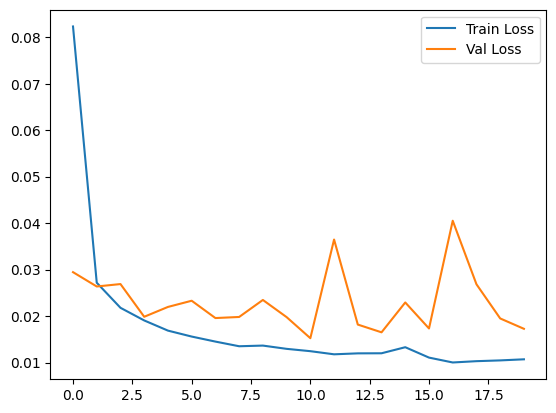

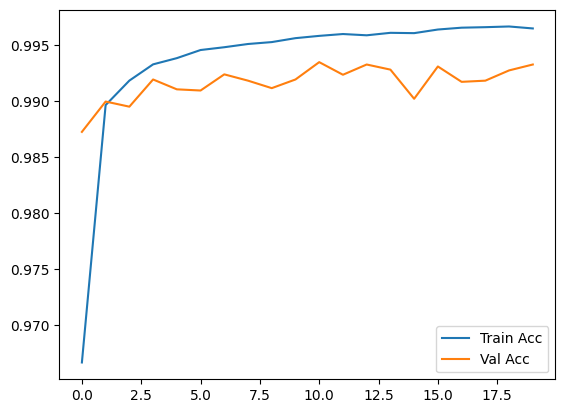

In [32]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.show()
